In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import csv

# Extract `profile.csv` from stats

## Functions

In [47]:
def extract_profile(stats_path, duration, fluctuation_threshold, mode):
    stats = pd.read_csv(stats_path)
    stats_dds = stats[stats['mode'] == mode]
    bandwidth_f1 = stats_dds.sort_values(by=['total-size'])

    # Byte -> bit -> Kbit -> Kbps
    bandwidth_f1['bitrate'] = bandwidth_f1['total-size'] * 8 / 1024 / duration

    # # Remove bad performance fluctuation
    # for index, row in bandwidth_f1.iterrows():

    bandwidth_f1_remove_fluc = bandwidth_f1.copy()

    num_row = bandwidth_f1.shape[0]

    for i in range(1, num_row):
        j = i
        while (bandwidth_f1.iloc[j].F1 - bandwidth_f1.iloc[i-1].F1 < -fluctuation_threshold):
            try:
                bandwidth_f1_remove_fluc = bandwidth_f1_remove_fluc.drop(bandwidth_f1.iloc[j].name)
            except:
                pass
            j += 1
            if (j >= num_row):
                break
    
    return bandwidth_f1_remove_fluc

## Playground

In [6]:
# profile_rene_adaptive = extract_profile("stats",
#                                 4, 0, "emulation-adaptive")
# profile_rene_adaptive_separated = extract_profile("stats",
#                                 4, 0, "emulation-adaptive-separated")

profile_rene_adaptive = extract_profile("stats",
                                4, 0, "emulation-adaptive")
profile_rene_aws = extract_profile("stats",
                                4, 0, "emulation-adaptive-separated")

In [7]:
profile_rene_adaptive

,video-name,low-resolution,high-resolution,low_qp,high_qp,batch-size,low-threshold,high-threshold,tracker-length,TP,FP,FN,F1,low-size,high-size,total-size,frames,bandwidth-limit,mode,bitrate
25,results/rene_dds_adaptive_500_0_twosides_batch...,0.1,0.2,34,28,5,0.5,0.8,4,33,34,937,0.064,104030,147402,251432,100,500,emulation-adaptive,491.078125
26,results/rene_dds_adaptive_1000_0_twosides_batc...,0.2,0.2,34,26,5,0.5,0.8,4,169,364,800,0.225,267970,218449,486419,100,1000,emulation-adaptive,950.037109
28,results/rene_dds_adaptive_1500_0_twosides_batc...,0.3,0.3,34,26,5,0.5,0.8,4,333,525,636,0.365,486865,273558,760423,100,1500,emulation-adaptive,1485.201172
30,results/rene_dds_adaptive_2000_0_twosides_batc...,0.3,0.5,34,26,5,0.5,0.8,4,461,651,509,0.443,486865,512276,999141,100,2000,emulation-adaptive,1951.447266
32,results/rene_dds_adaptive_2500_0_twosides_batc...,0.4,0.5,34,28,5,0.5,0.8,4,468,475,501,0.490,721809,488703,1210512,100,2500,emulation-adaptive,2364.281250
34,results/rene_dds_adaptive_3000_0_twosides_batc...,0.4,0.5,30,28,5,0.5,0.8,4,531,490,436,0.534,1010008,523810,1533818,100,3000,emulation-adaptive,2995.738281
36,results/rene_dds_adaptive_3500_0_twosides_batc...,0.4,0.7,30,28,5,0.5,0.8,4,597,537,369,0.569,1010008,732391,1742399,100,3500,emulation-adaptive,3403.123047
38,results/rene_dds_adaptive_4000_0_twosides_batc...,0.6,0.8,34,28,5,0.5,0.8,4,641,401,328,0.637,1193635,812889,2006524,100,4000,emulation-adaptive,3918.992188
40,results/rene_dds_adaptive_4500_0_twosides_batc...,0.6,0.8,32,28,5,0.5,0.8,4,677,386,290,0.667,1425842,779306,2205148,100,4500,emulation-adaptive,4306.929688
42,results/rene_dds_adaptive_5000_0_twosides_batc...,0.6,1.0,32,28,5,0.5,0.8,4,650,282,316,0.685,1425842,999295,2425137,100,5000,emulation-adaptive,4736.595703


# Plot profile

In [7]:
profile_rene_adaptive = pd.read_csv("./profile-rene/profile-separated/profile-10.csv")
profile_rene_adaptive
profile_rene_adaptive_aws = pd.read_csv("./profile-rene-aws/profile-separated/profile-10.csv")

0.609

## Functions

In [48]:
def F1_Bandwidth_plot(bandwidth_f1):
    # set figure size
    plt.figure(figsize=(12,6), dpi=80)

    plt.xlabel('Bandwidth (Kbps)')
    plt.ylabel('F1 Score')

    rene = plt.plot(bandwidth_f1['bandwidth'], bandwidth_f1['F1'],
    'o-',
    label = 'Rene-25-3',)

    # y-axis percentage
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    plt.ticklabel_format(style='plain', axis='x', )

    plt.legend()

In [57]:
def F1_Bandwidth_limit_plot_compare(bandwidth_f1_1, label1, bandwidth_f1_2, label2):
    if(bandwidth_f1_1['bandwidth'].iloc[-1] > bandwidth_f1_2['bandwidth'].iloc[-1]):
        tempF1 = bandwidth_f1_2['F1'].iloc[-1]
        bandwidth_f1_2 = bandwidth_f1_2.append(bandwidth_f1_1.iloc[-1], ignore_index=True)
        bandwidth_f1_2['F1'] = bandwidth_f1_2['F1'].replace(to_replace = bandwidth_f1_2['F1'].iloc[-1], value= tempF1)
    else:
        tempF1 = bandwidth_f1_1['F1'].iloc[-1]
        bandwidth_f1_1 = bandwidth_f1_1.append(bandwidth_f1_2.iloc[-1], ignore_index=True)
        bandwidth_f1_1['F1'] = bandwidth_f1_1['F1'].replace(to_replace = bandwidth_f1_1['F1'].iloc[-1], value= tempF1)
    # set figure size
    plt.figure(figsize=(12,6), dpi=80)

    plt.xlabel('Bandwidth Limit (Kbps)')
    plt.ylabel('F1 Score')

    plt1 = plt.plot(bandwidth_f1_1['bandwidth'], bandwidth_f1_1['F1'],
    'o-',
    label = label1,)
    plt2 = plt.plot(bandwidth_f1_2['bandwidth'], bandwidth_f1_2['F1'],
    'o-',
    label = label2,)

    # y-axis percentage
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    plt.ticklabel_format(style='plain', axis='x', )

    plt.legend()
    plt.ion()

## Playground

In [58]:

profile_rene_adaptive = pd.read_csv("./profile-rene/profile-separated/profile-5.csv")
profile_rene_adaptive
profile_rene_adaptive_aws = pd.read_csv("./profile-rene-aws/profile-separated/profile-5.csv")
F1_Bandwidth_limit_plot_compare(profile_rene_adaptive, "Rene-5", profile_rene_adaptive_aws, "Rene-aws-5")





# # Line Plotting
# plt.figure(figsize=(10,10))
# fig, ax = plt.subplots(2,2)
# fig.tight_layout(pad=3)
# fig.subplots_adjust(hspace=0.6, wspace=0.3)

# # plt.plot(bandwidth, reneOfflineE2E/2 + uav1OfflineE2E/2, 'o-')
# # plt.plot(bandwidth, reneFairE2E/2 + uav1FairE2E/2, 'o-')

# # plt.plot(bandwidth, reneOfflineTransmission/2 + uav1OfflineTransmission/2, 'o-', label='offline')
# # plt.plot(bandwidth, reneFairTransmission/2 + uav1FairTransmission/2, 'o-', label='fair')
# # plt.legend()

# ax[0,0].plot(test1)
# # ax[0][0].xlabel("Bandwidth (kbit/s)")
# # ax[0][0].ylabel("Total F1-score")
# # ax[0][0].legend()

# ax[0,1].plot(test2)
# # ax[0][1].xlabel("Bandwidth (kbit/s)")
# # ax[0][1].ylabel("Total F1-score")
# # ax[0][1].legend()

# ax[1,0].plot(test3)


# ax[1,1].plot(test4)


# for a in ax.flat:
#     a.set(xlabel='bandwidth (kbit/s)', ylabel='latency (s)')

# plt.figlegend(['offline-profile', 'fair-allocation'], loc='upper right', fontsize='xx-small')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for a in ax.flat:
#     a.label_outer()

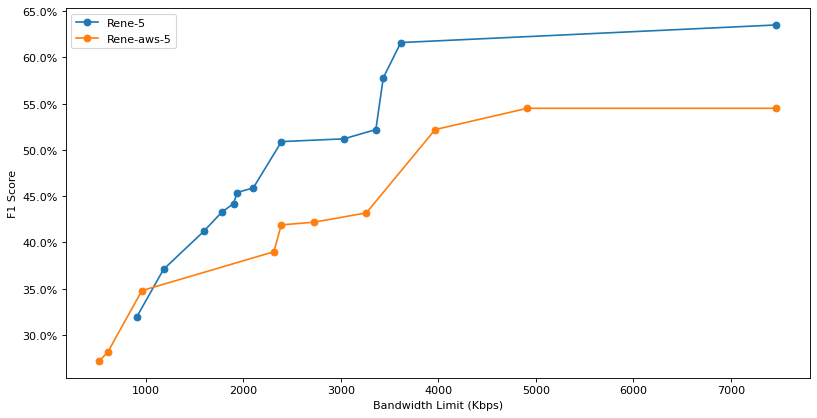

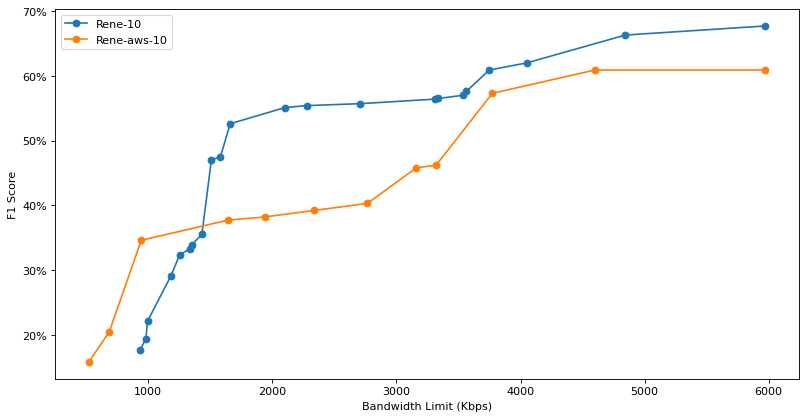

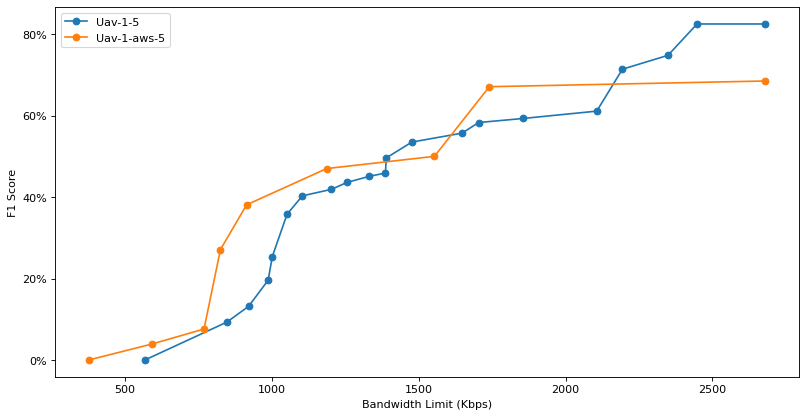

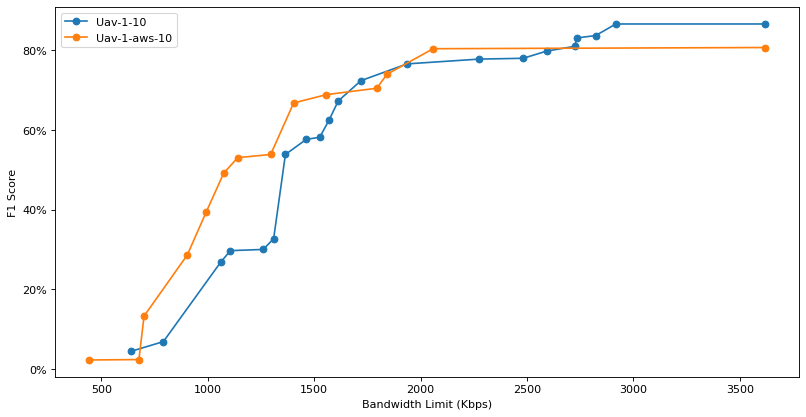

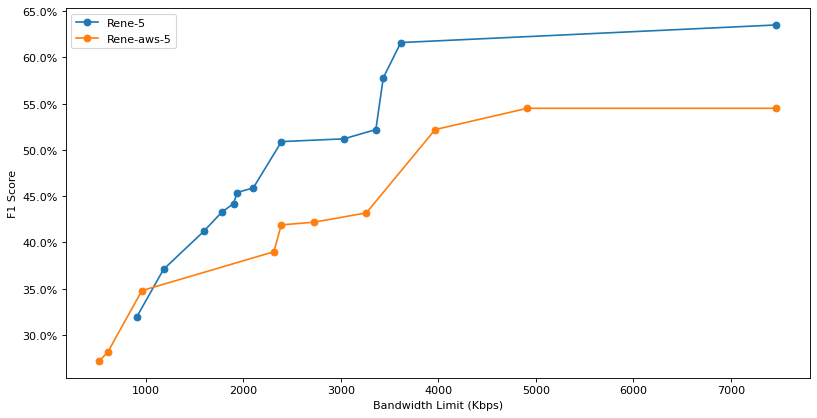

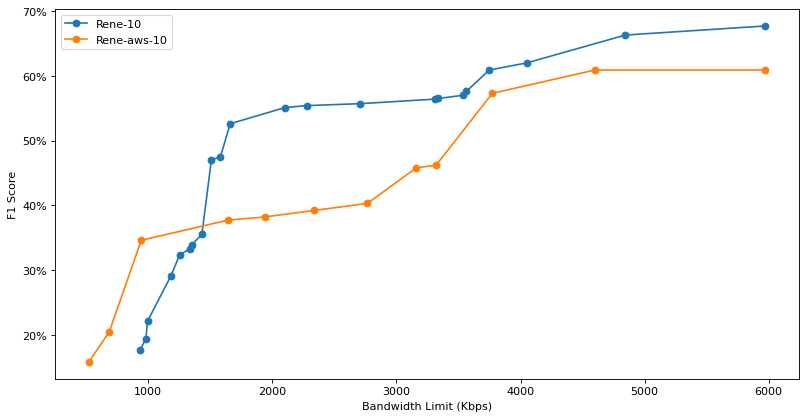

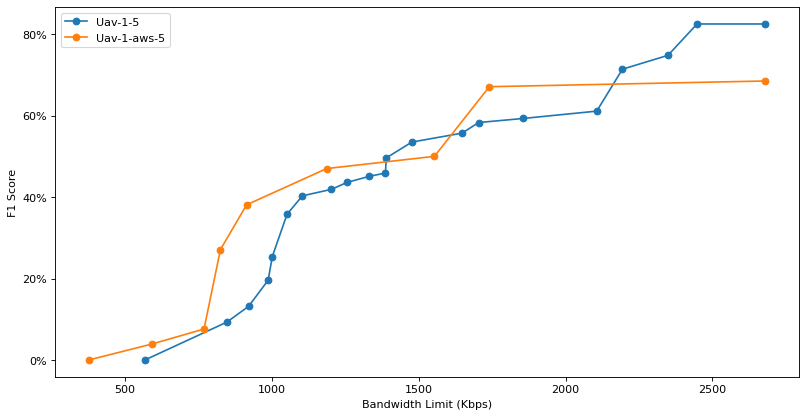

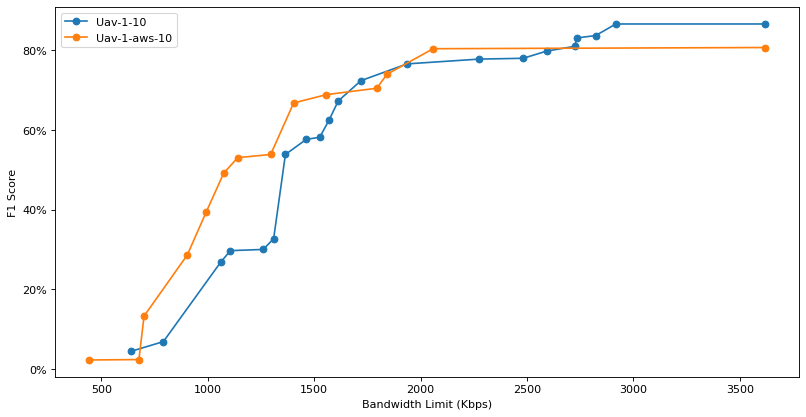

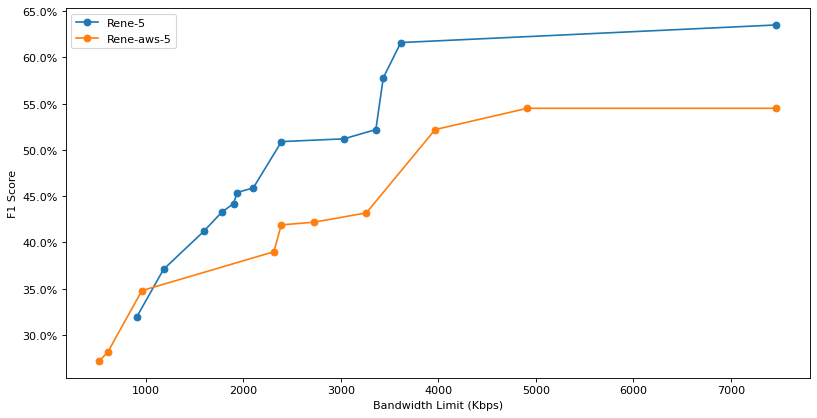

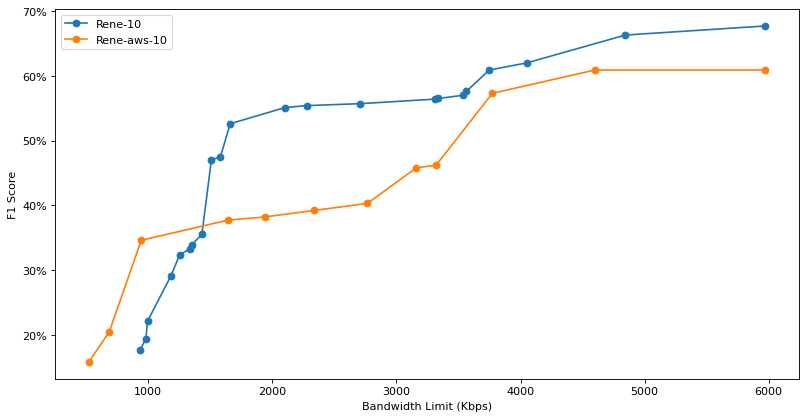

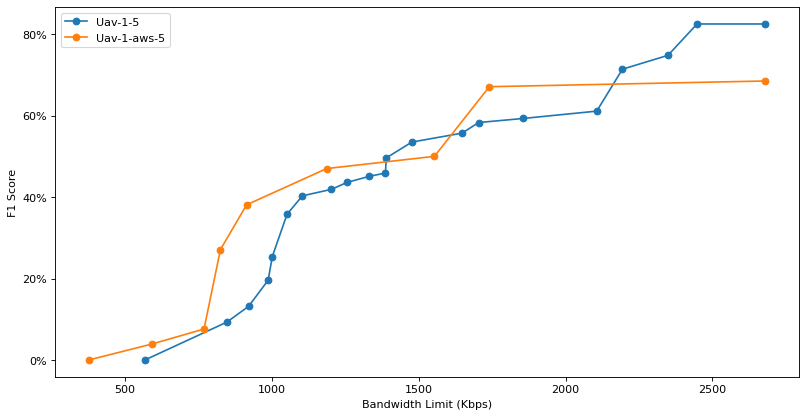

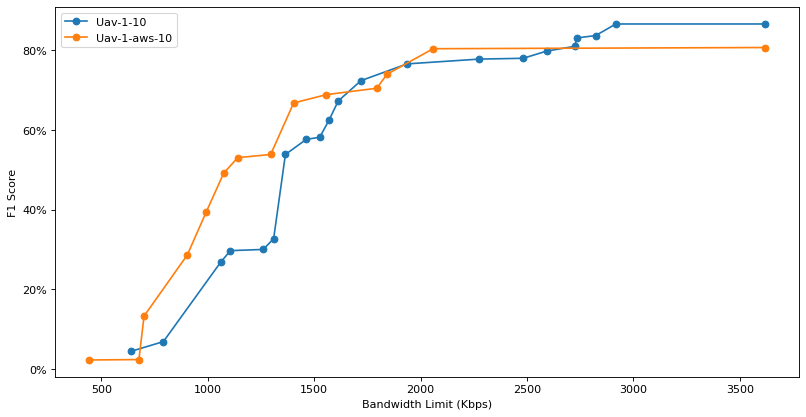

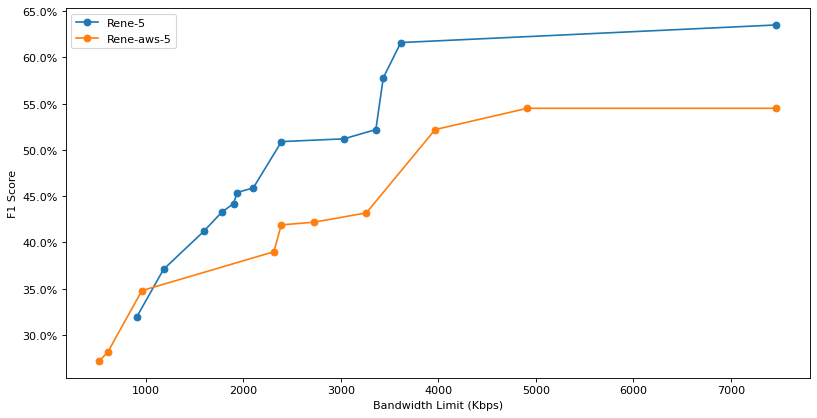

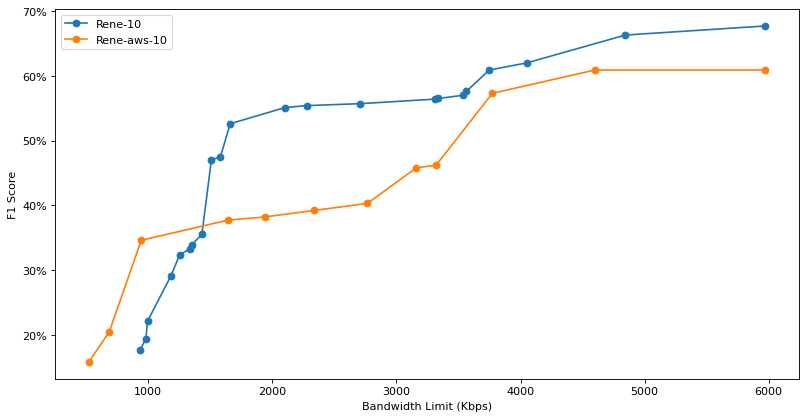

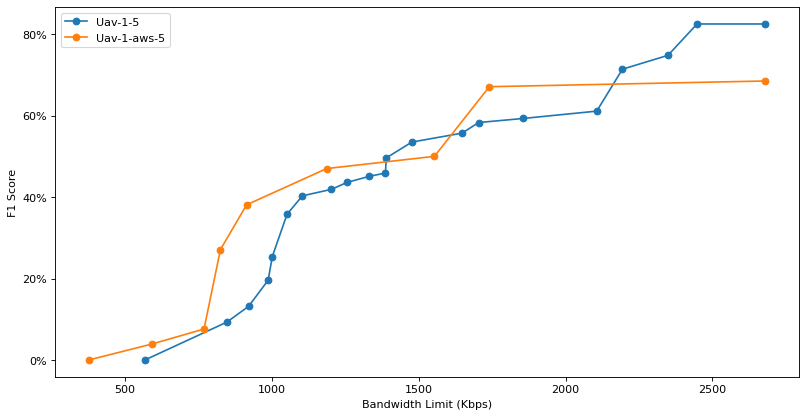

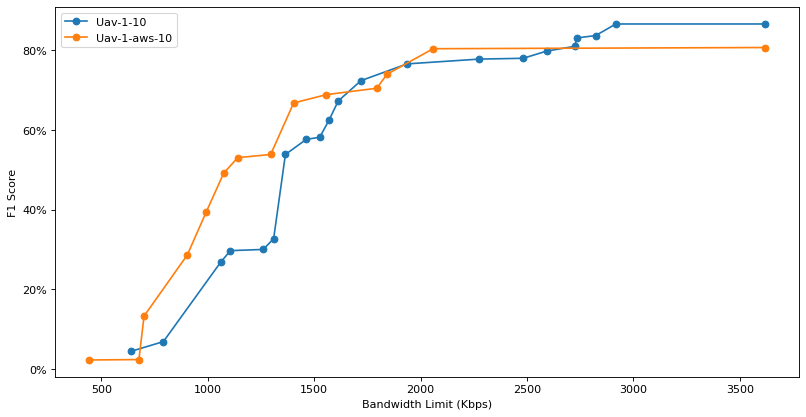

<Figure size 1000x1000 with 0 Axes>

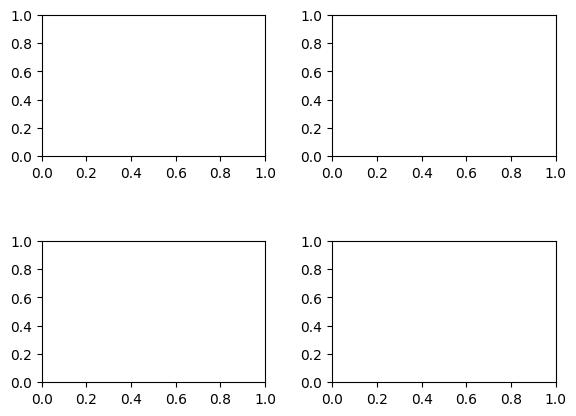

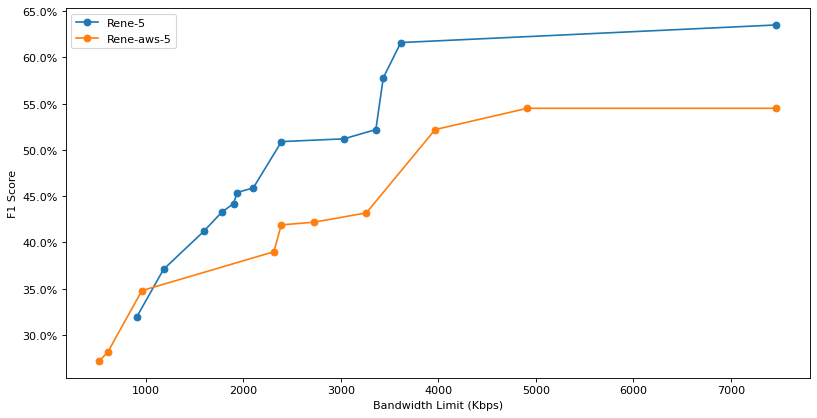

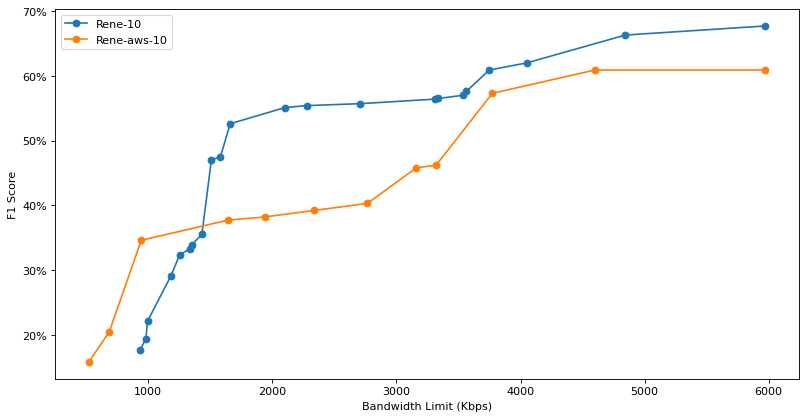

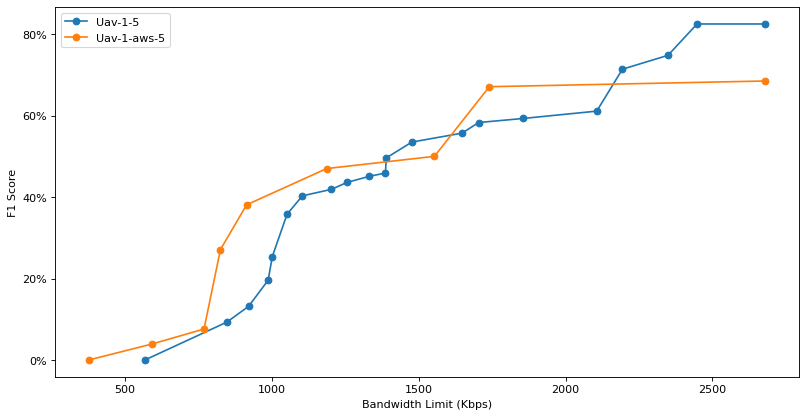

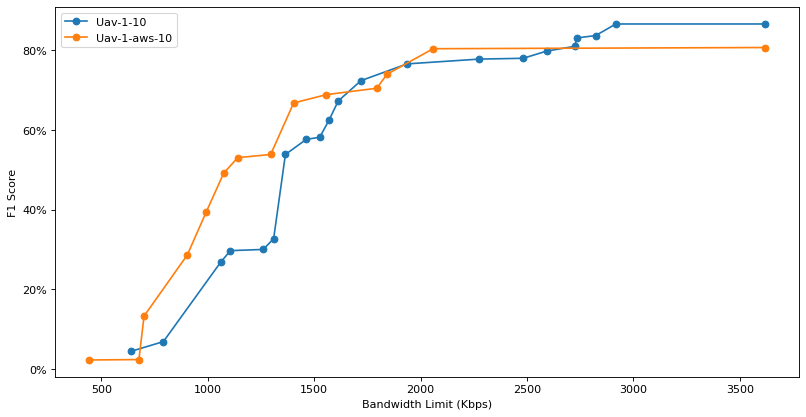

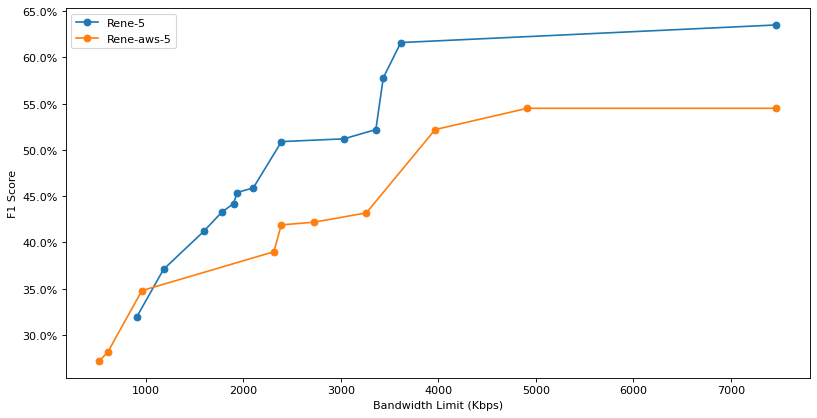

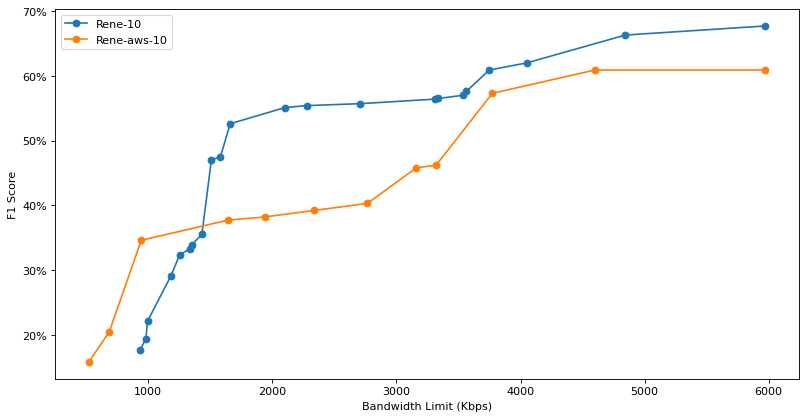

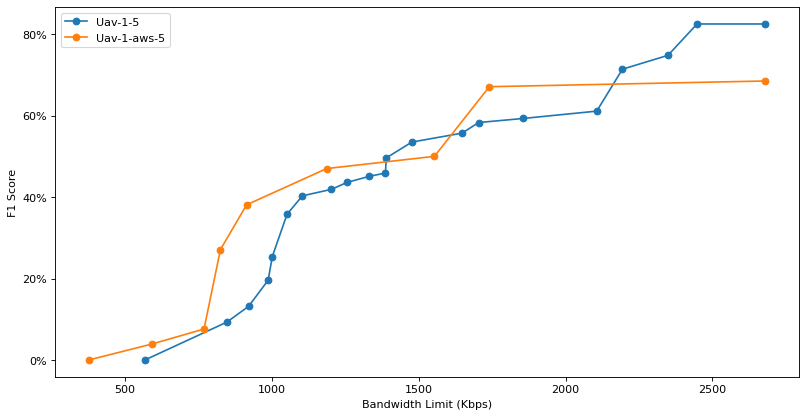

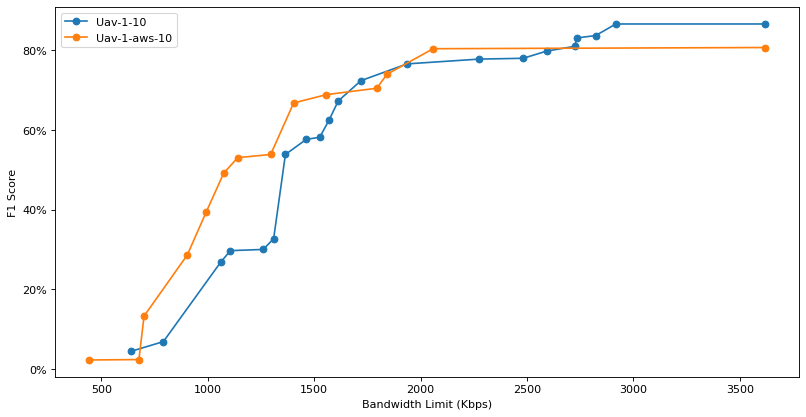

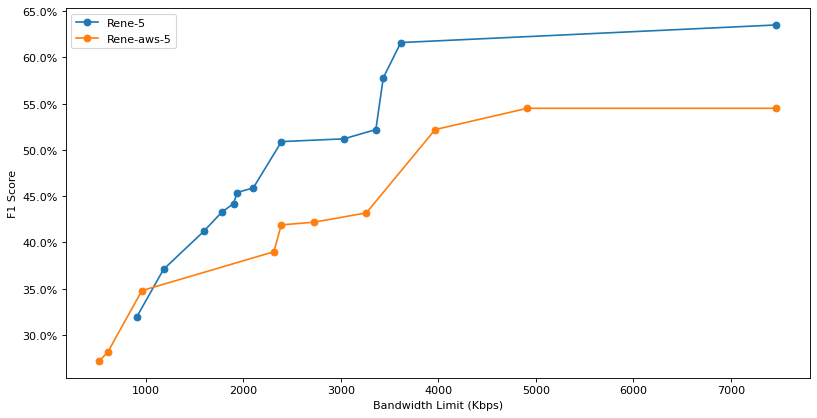

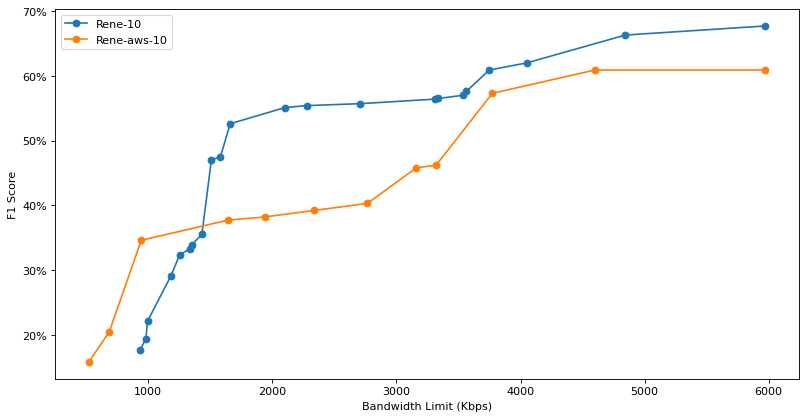

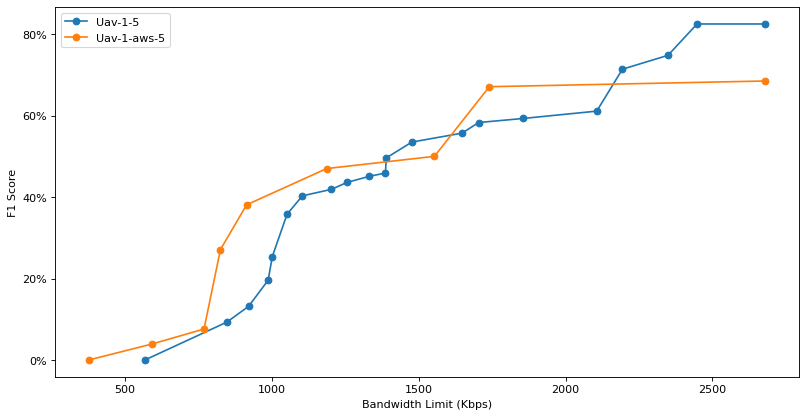

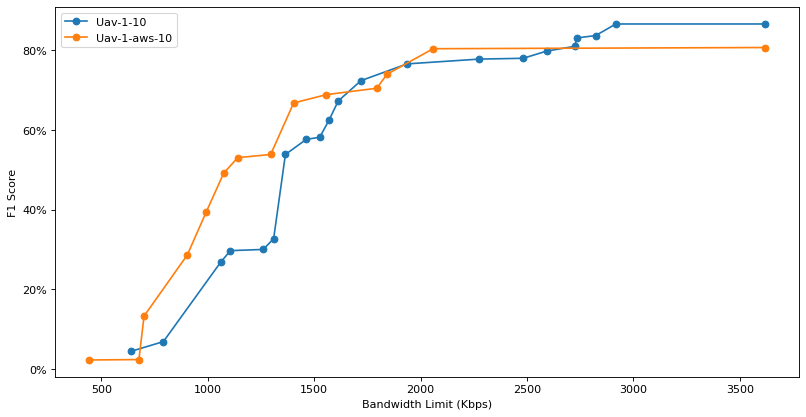

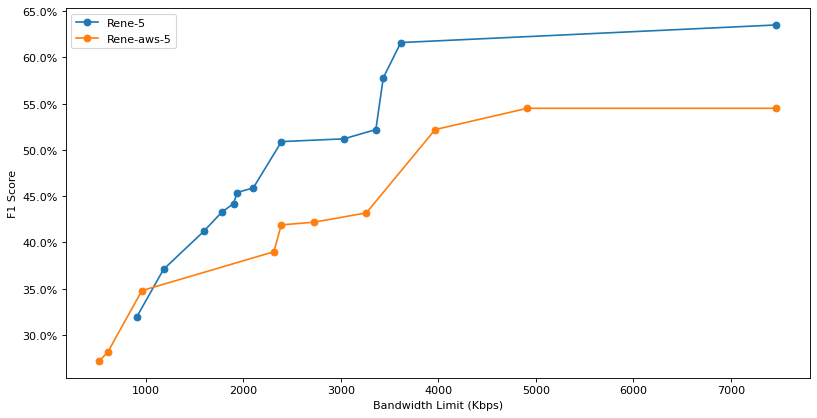

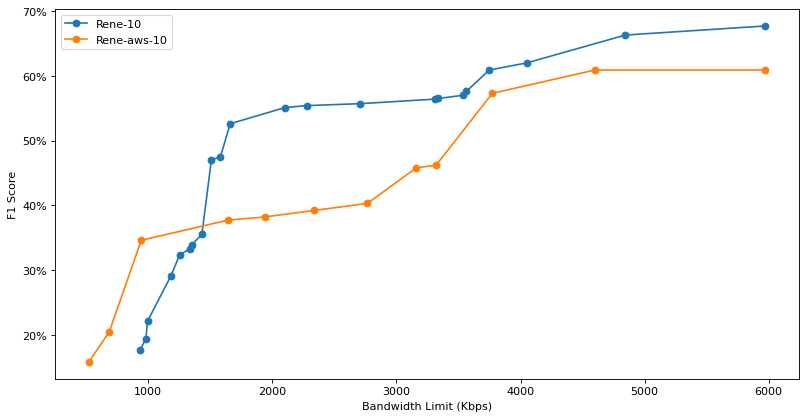

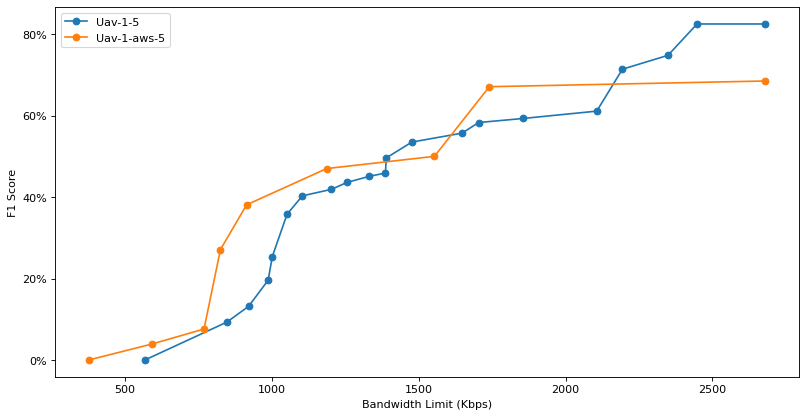

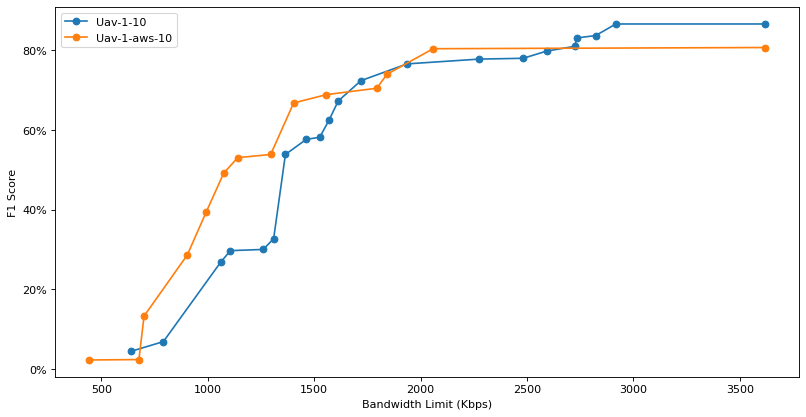

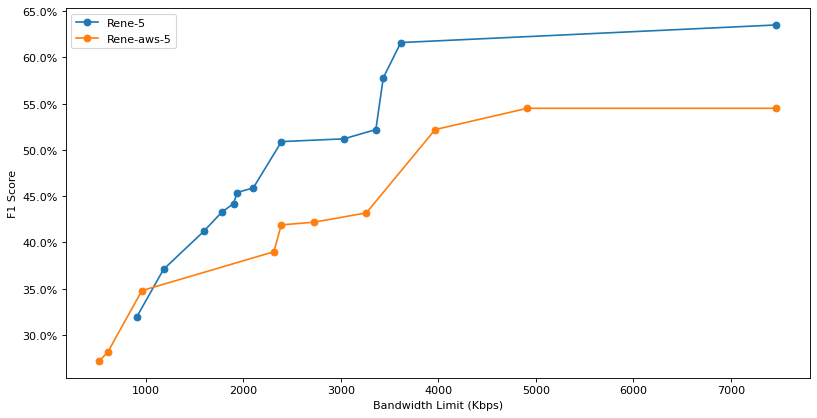

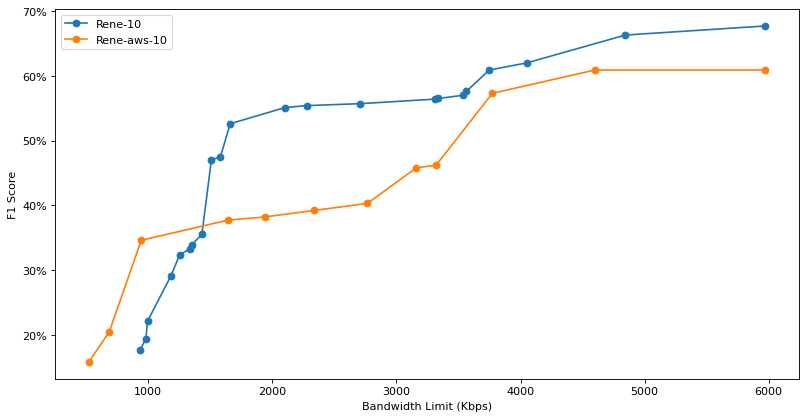

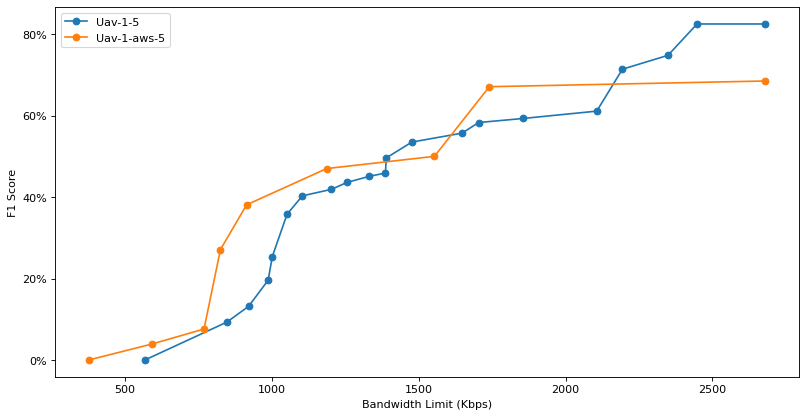

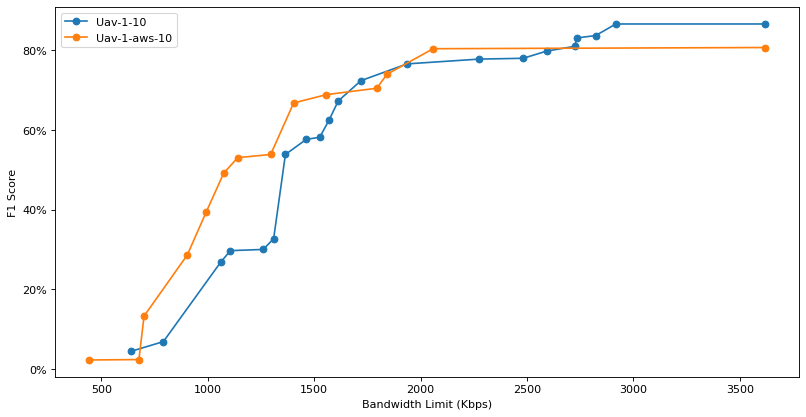

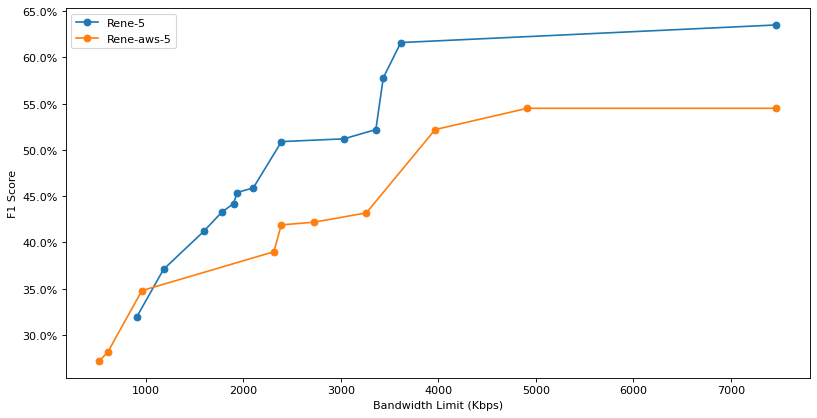

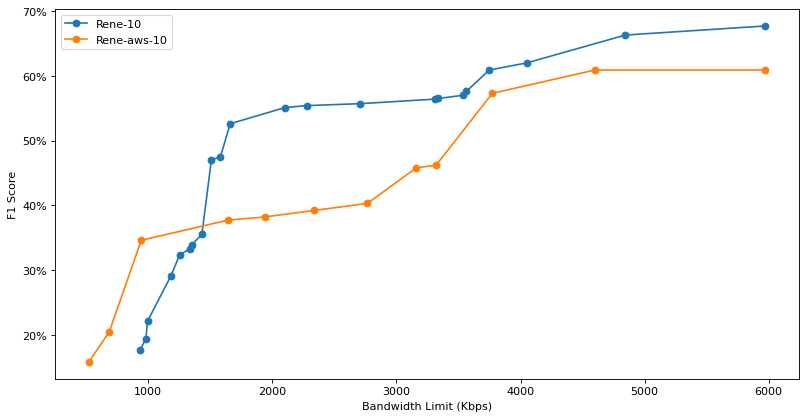

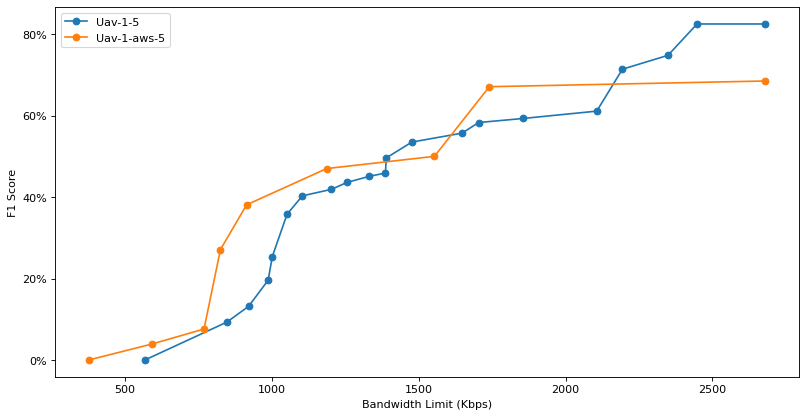

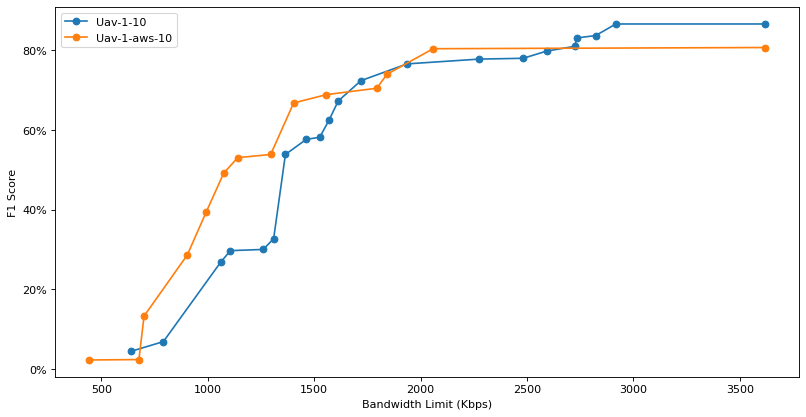

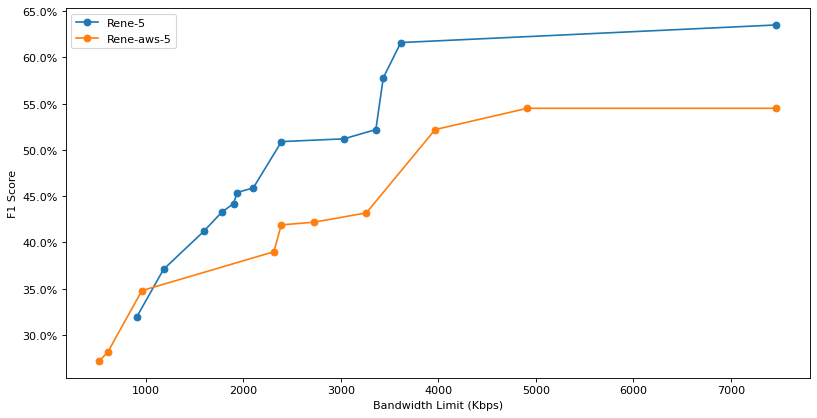

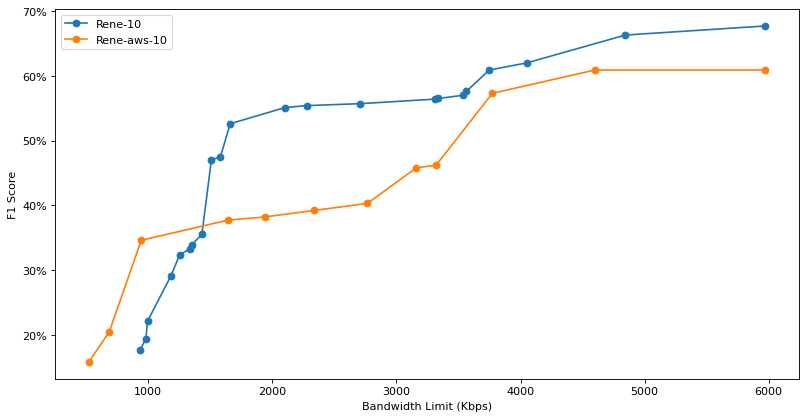

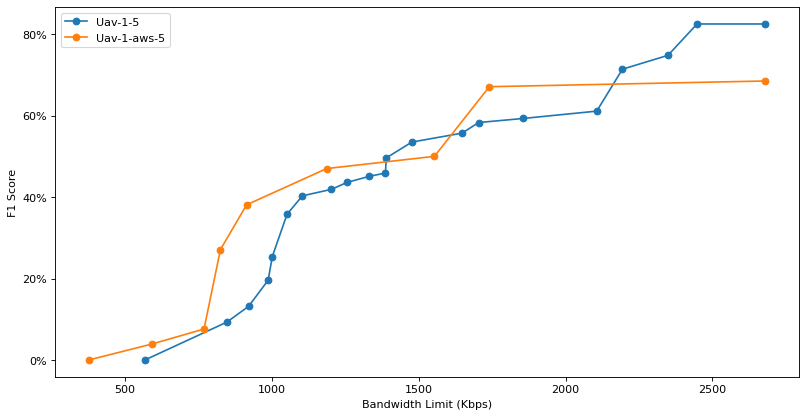

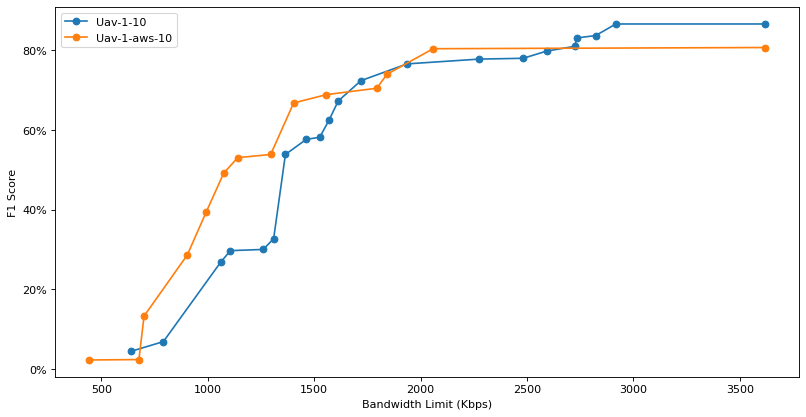

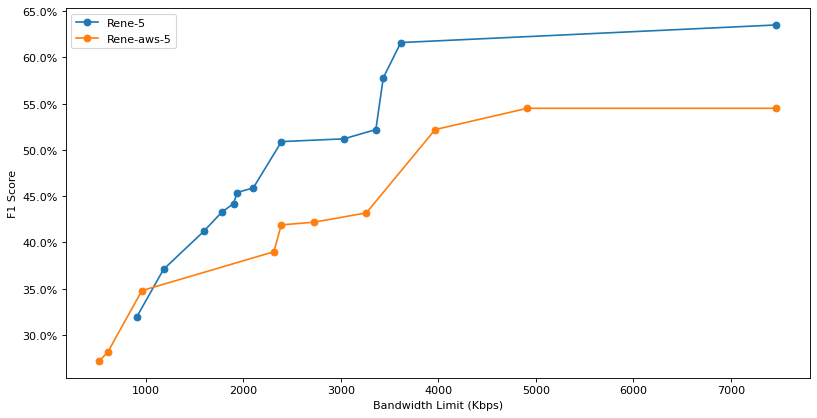

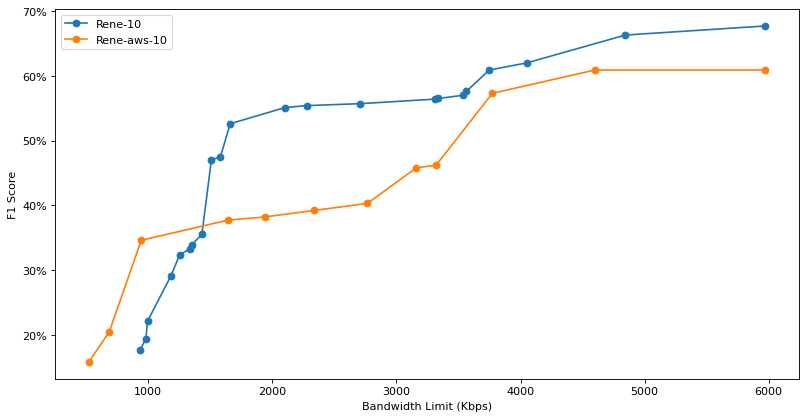

In [59]:
profile_rene_adaptive = pd.read_csv("./profile-rene/profile-separated/profile-10.csv")
profile_rene_adaptive
profile_rene_adaptive_aws = pd.read_csv("./profile-rene-aws/profile-separated/profile-10.csv")
F1_Bandwidth_limit_plot_compare(profile_rene_adaptive, "Rene-10", profile_rene_adaptive_aws, "Rene-aws-10")





In [55]:
profile_rene_adaptive = pd.read_csv("./profile-uav-1/profile-separated/profile-5.csv")
profile_rene_adaptive
profile_rene_adaptive_aws = pd.read_csv("./profile-uav-1-aws/profile-separated/profile-5.csv")
F1_Bandwidth_limit_plot_compare(profile_rene_adaptive, "Uav-1-5", profile_rene_adaptive_aws, "Uav-1-aws-5")




In [56]:
profile_rene_adaptive = pd.read_csv("./profile-uav-1/profile-separated/profile-10.csv")
profile_rene_adaptive
profile_rene_adaptive_aws = pd.read_csv("./profile-uav-1-aws/profile-separated/profile-10.csv")
F1_Bandwidth_limit_plot_compare(profile_rene_adaptive, "Uav-1-10", profile_rene_adaptive_aws, "Uav-1-aws-10")

In [41]:
len(profile_rene.index)

45

In [42]:
len(profile_rene_adaptive.index)
# profile_rene_adaptive

44